# Bag of classifiers demo
In this notebook, I create a synthetic dataset and classify that dataset using different classifiers.

First, I'll define all models of the classifier in a bag of classifier variable, and then iteratively use those model to generate decision area. I also compare the accuracy of these models. These accuracy values are only for this specific dataset, and the model settings.  Therefore, this should not be treated as a measure of good and bad classifier indication.

## Import related Python packages

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from IPython.core.pylabtools import figsize
figsize(32, 32)

## Define the Plotting function

In [85]:
# define plotting function
def plotclasses(x,y,ax,plottitle='Training samples on feature domain'):
    ## Plot datas
    ax.scatter(x[y,0],x[y,1],marker='.', s=100,color='r',alpha=0.5,label='Red Class')
    ax.scatter(x[~y,0],x[~y,1],marker='.', s=100,color='g',alpha=0.5, label='Green Class')
    ax.set_title(plottitle, fontsize=25, fontweight='bold')
    

## Define all classifiers and names

In [86]:
# define all classifiers and names
bag_of_classifier=[{'model':LinearDiscriminantAnalysis(), 'name':'LDA'},
                   {'model':LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto'), 'name':'LDA shrinkage'},
                   {'model':QuadraticDiscriminantAnalysis(),'name':'QDA'},
                   {'model':KNeighborsClassifier(3), 'name':'3-KNN'},
                   {'model':SVC(kernel='linear',C=0.25), 'name':'SVM Linear kernel'},
                   {'model':SVC(kernel='poly',degree=2), 'name':'SVM 2deg-poly kernel'},
                   {'model':SVC(kernel='rbf'), 'name':'SVM RBF kernel'},
                   {'model': DecisionTreeClassifier(max_depth=5), 'name':'Decision tree depth-5'},
                   {'model': DecisionTreeClassifier(max_depth=10), 'name':'Decision tree depth-10'},
                   {'model':RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), 'name':'Random forest 10-trees'},
                   {'model':RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1), 'name':'Random forest 20-trees'},
                   {'model': AdaBoostClassifier(), 'name':'AdaBoost'},
                   {'model': GaussianNB(), 'name':'Naive Bayes'},
                   {'model':  MLPClassifier(), 'name':'Neural Network'},
                   {'model': GaussianProcessClassifier(), 'name':'Gaussian Process Classifier'},
                   ]

## Generate training and testing dataset
The training samples and uniformly spaces. The testing dataset spreads over the whole dataset region. Therefore, we can draw a decision boundary in higher resolution for better visualization.

In [87]:
# Generate training data
N=2000;
x=np.random.uniform(-1,1,(N,2))
y=np.sqrt(x[:,0]**2+x[:,1]**2)<0.5

# Generate testing data over the whole region
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
xtest=np.c_[xx.ravel(), yy.ravel()]
trueArea=np.sqrt(xtest[:,0]**2+xtest[:,1]**2)<0.5

## Configure subplots for visualization

In [88]:
# Configure subplots
plot_count=int(np.ceil(np.sqrt(len(bag_of_classifier)+1)))
f,ax = plt.subplots(plot_count,plot_count,sharex=True, sharey=True)
ax=ax.ravel()
plotclasses(x,y,ax[0])
k=1

## Perform classification

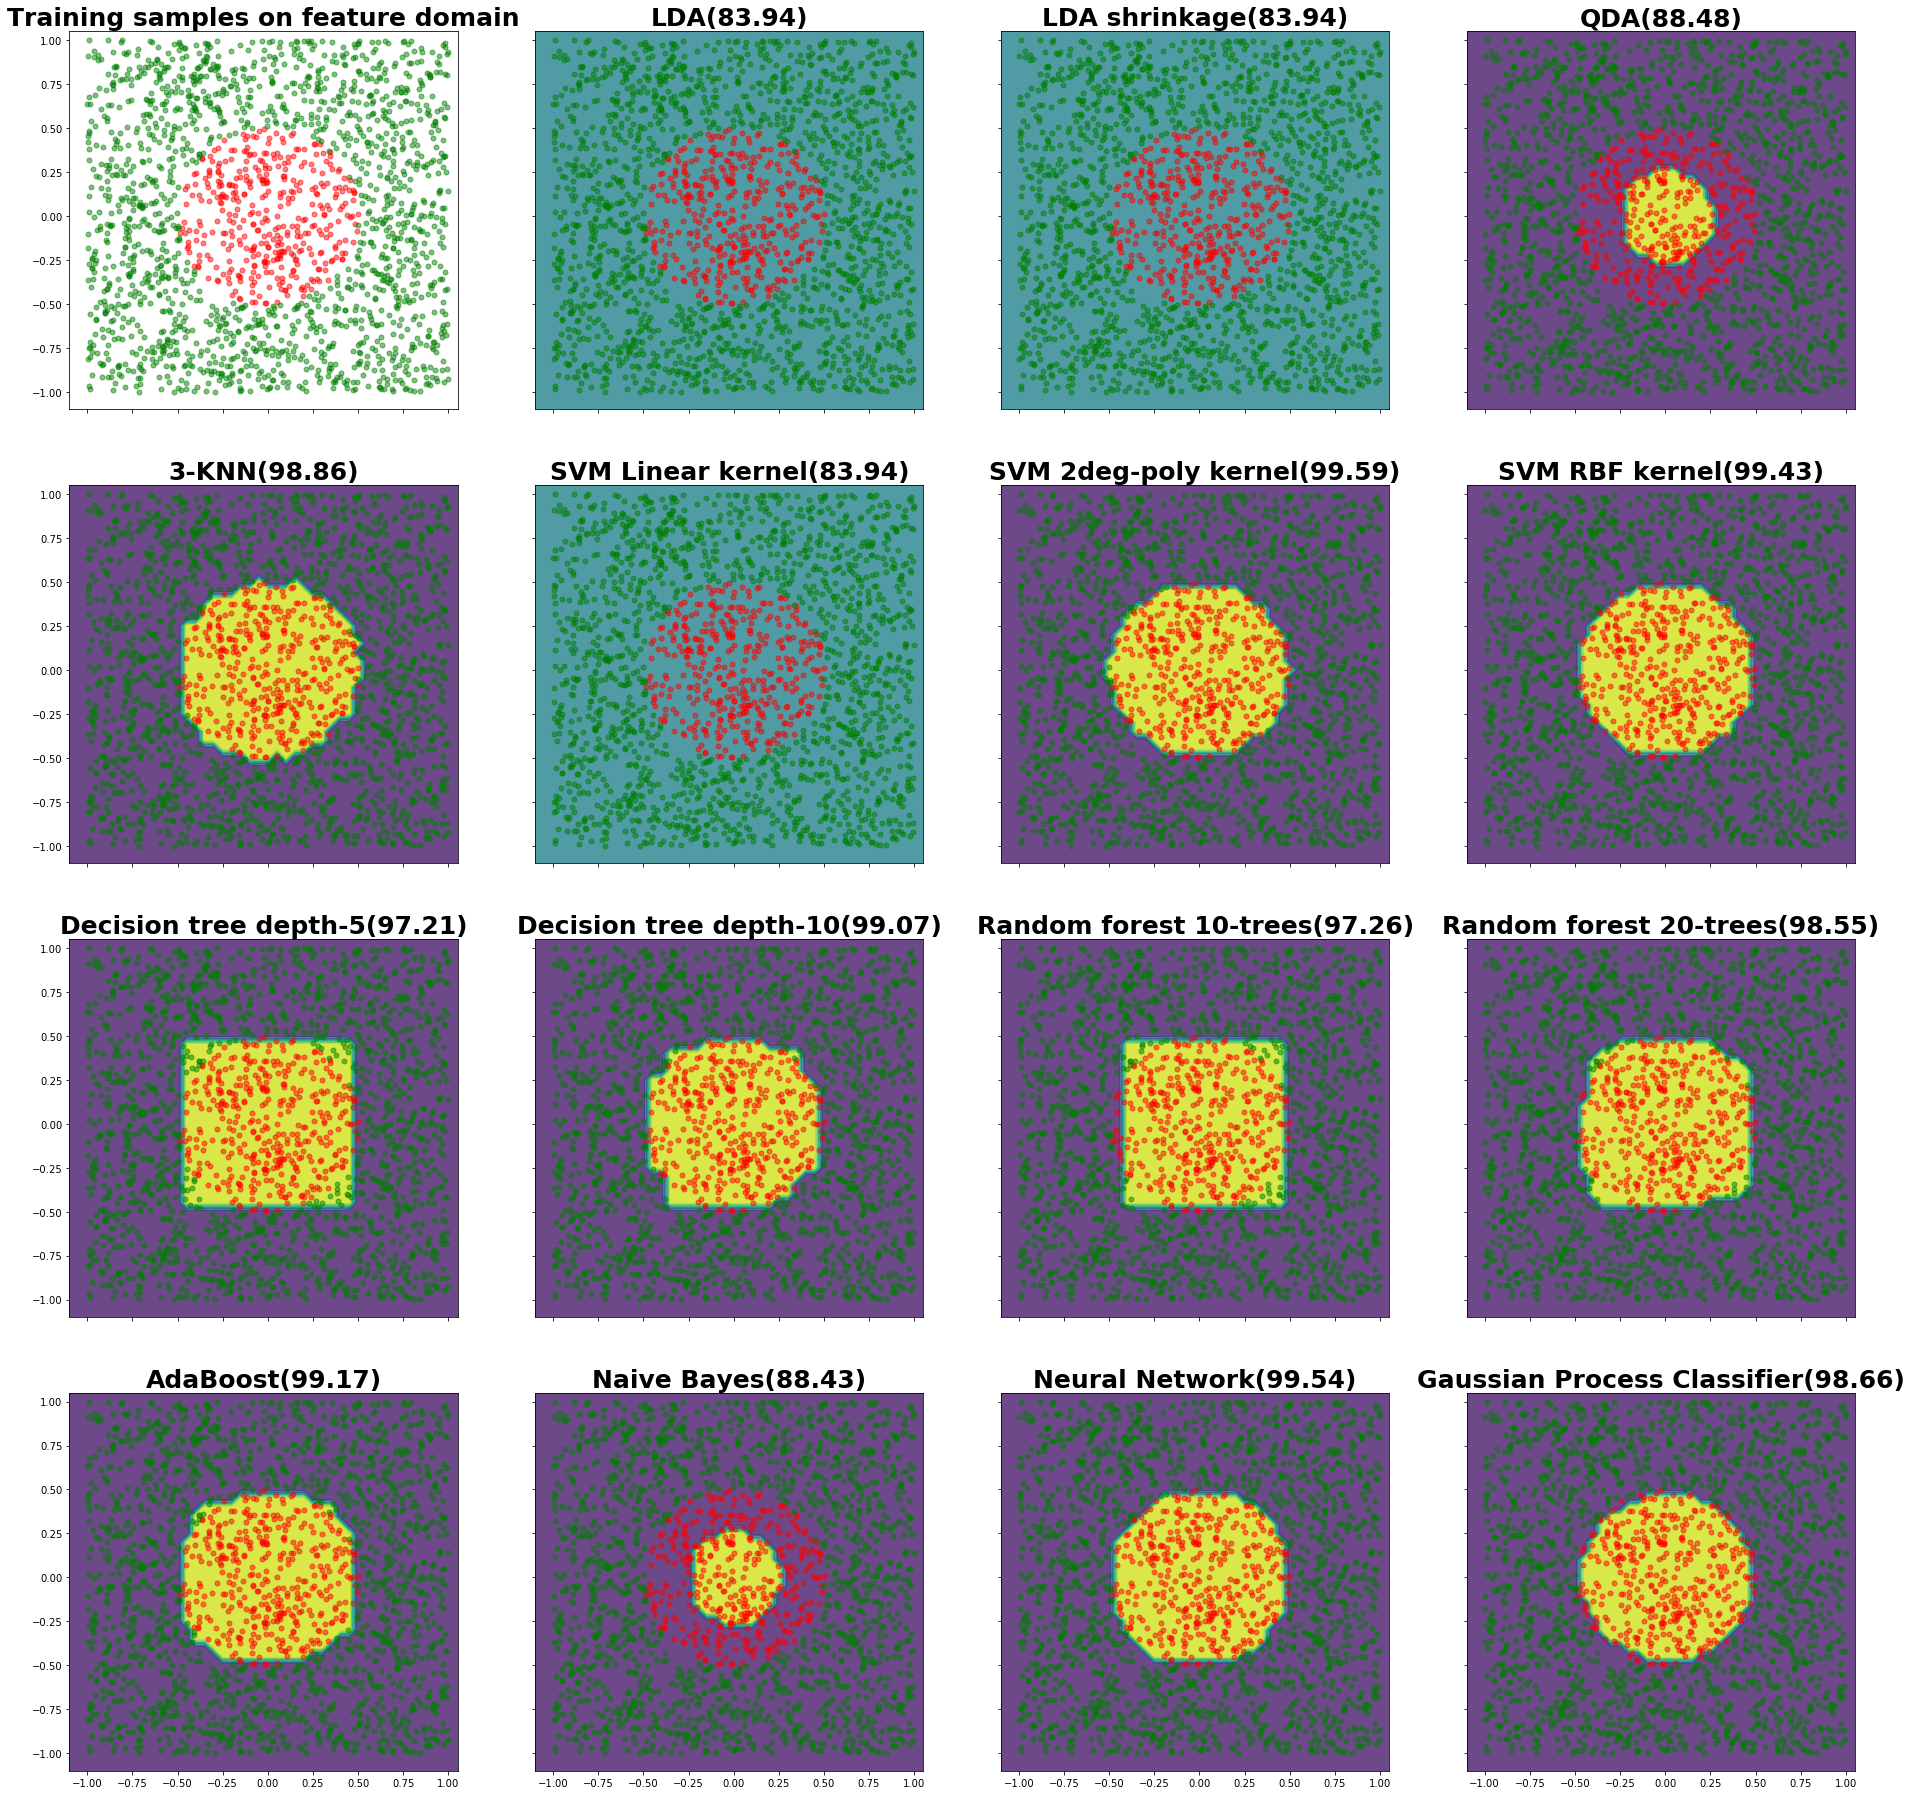

In [89]:
# Perform classification using bag of classifiers
for classifier in bag_of_classifier:
    model=classifier['model'].fit(x,y)
    decisionArea = model.predict(xtest)
    accuracy=100*np.sum(trueArea==decisionArea)/float(len(xtest))
    
    Z = decisionArea.reshape(xx.shape)
    
    # plot decision area, samples and print accuracy in title
    ax[k].contourf(xx, yy, Z, alpha=.8)  
    plotclasses(x,y,ax[k],classifier['name']+'(%.2f)'%accuracy)
    k+=1

    
    
plt.show()